In [76]:
pip install autots


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.9 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [78]:
from autots import AutoTS, load_daily
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


In [99]:
import pandas as pd
ts_ms = pd.date_range(start = '2023-03-10 23:13:20',     # 날짜 범위 시작
                     end = None,                # 날짜 범위 끝
                     periods = 19304,               # 생성할 Timestamp 개수
                     freq = 'T',               # 시간 간격(MS : 월의 시작일)
                     tz = 'Asia/Seoul')         # 시간대(timezone)
print(ts_ms)

DatetimeIndex(['2023-03-10 23:13:20+09:00', '2023-03-10 23:14:20+09:00',
               '2023-03-10 23:15:20+09:00', '2023-03-10 23:16:20+09:00',
               '2023-03-10 23:17:20+09:00', '2023-03-10 23:18:20+09:00',
               '2023-03-10 23:19:20+09:00', '2023-03-10 23:20:20+09:00',
               '2023-03-10 23:21:20+09:00', '2023-03-10 23:22:20+09:00',
               ...
               '2023-03-24 08:47:20+09:00', '2023-03-24 08:48:20+09:00',
               '2023-03-24 08:49:20+09:00', '2023-03-24 08:50:20+09:00',
               '2023-03-24 08:51:20+09:00', '2023-03-24 08:52:20+09:00',
               '2023-03-24 08:53:20+09:00', '2023-03-24 08:54:20+09:00',
               '2023-03-24 08:55:20+09:00', '2023-03-24 08:56:20+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', length=19304, freq='T')


In [101]:
long = False
df = pd.read_csv('/Users/sunflower/Korea/실험환경/python/data/cpu_memory_usage_v1.csv', header=0)
df = df.loc[df.pod_name == 'drive-az2-prd-69cbb999bc-lpr67']
df = df.loc[:,['index','time','cpu_usage_nanocores', 'memory_working_set_bytes']]
df = df.dropna()


ms = MinMaxScaler()

df[['cpu_usage_nanocores','memory_working_set_bytes']] = ms.fit_transform(df[['cpu_usage_nanocores','memory_working_set_bytes']])
df['time'] = ts_ms
df.set_index('time', inplace=True)
df

,index,cpu_usage_nanocores,memory_working_set_bytes
time,,,
2023-03-10 23:13:20+09:00,2,0.411576,0.044959
2023-03-10 23:14:20+09:00,18,0.481051,0.044911
2023-03-10 23:15:20+09:00,31,0.500366,0.049663
2023-03-10 23:16:20+09:00,39,0.441449,0.049532
2023-03-10 23:17:20+09:00,52,0.681631,0.050024
...,...,...,...
2023-03-24 08:52:20+09:00,231587,0.031644,0.066024
2023-03-24 08:53:20+09:00,231589,0.024549,0.066039
2023-03-24 08:54:20+09:00,231605,0.036685,0.066039


In [102]:

model = AutoTS(
    forecast_length=21,
    frequency='infer',
    prediction_interval=0.9,
    ensemble=None,
    model_list="fast",  # "superfast", "default", "fast_parallel"
    transformer_list="fast",  # "superfast",
    drop_most_recent=1,
    max_generations=4,
    num_validations=2,
    validation_method="backwards"
)

In [103]:

model = model.fit(
    df,
    date_col='time' if long else None,
    value_col='memory_working_set_bytes' if long else None,
    id_col='index' if long else None,
)


Inferred frequency is: T
Model Number: 1 with model AverageValueNaive in generation 0 of 4
Model Number: 2 with model AverageValueNaive in generation 0 of 4
Model Number: 3 with model AverageValueNaive in generation 0 of 4
Model Number: 4 with model DatepartRegression in generation 0 of 4
Model Number: 5 with model DatepartRegression in generation 0 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 6 with model DatepartRegression in generation 0 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 7 with model DatepartRegression in generation 0 of 4
Epoch 1/50


2023-04-05 19:47:17.363172: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


603/603 [==============================] - 3s 2ms/step - loss: 0.2778
Epoch 2/50
603/603 [==============================] - 1s 1ms/step - loss: 0.2209
Epoch 3/50
603/603 [==============================] - 1s 2ms/step - loss: 0.1593
Epoch 4/50
603/603 [==============================] - 1s 1ms/step - loss: 0.1477
Epoch 5/50
603/603 [==============================] - 1s 2ms/step - loss: 0.1407
Epoch 6/50
603/603 [==============================] - 1s 1ms/step - loss: 0.1367
Epoch 7/50
603/603 [==============================] - 1s 1ms/step - loss: 0.1279
Epoch 8/50
603/603 [==============================] - 1s 1ms/step - loss: 0.1221
Epoch 9/50
603/603 [==============================] - 1s 2ms/step - loss: 0.1159
Epoch 10/50
603/603 [==============================] - 1s 2ms/step - loss: 0.1124
Epoch 11/50
603/603 [==============================] - 1s 1ms/step - loss: 0.1080
Epoch 12/50
603/603 [==============================] - 1s 1ms/step - loss: 0.1074
Epoch 13/50
603/603 [===============

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 29 with model DatepartRegression in generation 0 of 4
Model Number: 30 with model ETS in generation 0 of 4
Model Number: 31 with model VECM in generation 0 of 4
Model Number: 32 with model MultivariateMotif in generation 0 of 4
Model Number: 33 with model MultivariateMotif in generation 0 of 4
Model Number: 34 with model UnivariateMotif in generation 0 of 4
Model Number: 35 with model UnivariateMotif in generation 0 of 4
Model Number: 36 with model SectionalMotif in generation 0 of 4
Model Number: 37 with model SectionalMotif in generation 0 of 4
Model Number: 38 with model SeasonalNaive in generation 0 of 4
Model Number: 39 with model DatepartRegression in generation 0 of 4


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 40 with model NVAR in generation 0 of 4
Model Number: 41 with model Cassandra in generation 0 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 42 with model ConstantNaive in generation 0 of 4
Model Number: 43 with model LastValueNaive in generation 0 of 4
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 43 in generation 0: LastValueNaive
Model Number: 44 with model AverageValueNaive in generation 0 of 4
Model Number: 45 with model GLS in generation 0 of 4
Model Number: 46 with model SeasonalNaive in generation 0 of 4
Model Number: 47 with model GLM in generation 0 of 4
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 47 in generation 0: GLM
Model Number: 48 with model ETS in generation 0 of 4
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on index with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal compone

/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()


Model Number: 62 with model SeasonalityMotif in generation 0 of 4
Model Number: 63 with model MetricMotif in generation 0 of 4
Model Number: 64 with model ETS in generation 0 of 4
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 64 in generation 0: ETS
Model Number: 65 with model VECM in generation 0 of 4
Model Number: 66 with model MAR in generation 0 of 4
Template Eval Error: ValueError('Shape of passed values is (7, 3), indices imply (21, 3)') in model 66 in generation 0: MAR
Model Number: 67 with model GLS in generation 0 of 4
Model Number: 68 with model MAR in generation 0 of 4
Model Number: 69 with model ETS in generation 0 of 4
Model Number: 70 with model VECM in generation 0 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 70 in generation 0: VECM
Model Number: 71 with model SectionalMotif in generation 0 of 4
Model Number: 72 with model ETS in generation 0 of 4
ETS error ValueError('

/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:550: RuntimeWarning: invalid value encountered in divide
  avg = np.multiply(a, wgt,


Model Number: 84 with model SectionalMotif in generation 0 of 4
Model Number: 85 with model VAR in generation 0 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()


Model Number: 86 with model MetricMotif in generation 0 of 4
Model Number: 87 with model WindowRegression in generation 0 of 4
Template Eval Error: LightGBMError('[gamma]: at least one target label is negative') in model 87 in generation 0: WindowRegression
Model Number: 88 with model ETS in generation 0 of 4


[LightGBM] [Fatal] [gamma]: at least one target label is negative
[LightGBM] [Fatal] [gamma]: at least one target label is negative
[LightGBM] [Fatal] [gamma]: at least one target label is negative
[LightGBM] [Fatal] [gamma]: at least one target label is negative
[LightGBM] [Fatal] [gamma]: at least one target label is negative
[LightGBM] [Fatal] [gamma]: at least one target label is negative
[LightGBM] [Fatal] [gamma]: at least one target label is negative
[LightGBM] [Fatal] [gamma]: at least one target label is negative
[LightGBM] [Fatal] [gamma]: at least one target label is negative
[LightGBM] [Fatal] [gamma]: at least one target label is negative
[LightGBM] [Fatal] [gamma]: at least one target label is negative


Model Number: 89 with model WindowRegression in generation 0 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 89 in generation 0: WindowRegression
Model Number: 90 with model NVAR in generation 0 of 4
Model Number: 91 with model MetricMotif in generation 0 of 4
Model Number: 92 with model MetricMotif in generation 0 of 4
Model Number: 93 with model ConstantNaive in generation 0 of 4
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 93 in generation 0: ConstantNaive
Model Number: 94 with model ConstantNaive in generation 0 of 4
Model Number: 95 with model UnivariateMotif in generation 0 of 4
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 95 in generation 0: UnivariateMotif
Model Number: 96 with model LastValueNaive in generation 0 of 4
Model Number: 97 with model LastValueNaive in generation 0 of 4
Model Number: 98 

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.2112e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 110 with model RRVAR in generation 0 of 4
Model Number: 111 with model WindowRegression in generation 0 of 4
Template Eval Error: LightGBMError('[gamma]: at least one target label is negative') in model 111 in generation 0: WindowRegression
Model Number: 112 with model VECM in generation 0 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 112 in generation 0: VECM
Model Number: 113 with model AverageValueNaive in generation 0 of 4
Model Number: 114 with model ConstantNaive in generation 0 of 4
Model Number: 115 with model SeasonalityMotif in generation 0 of 4


[LightGBM] [Fatal] [gamma]: at least one target label is negative
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.2112e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 115 in generation 0: SeasonalityMotif
Model Number: 116 with model SeasonalityMotif in generation 0 of 4
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 116 in generation 0: SeasonalityMotif
Model Number: 117 with model ETS in generation 0 of 4
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on cpu_usage_nanocores with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on memory_working_set_bytes with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 118 with model LastValueNaive in generation 0 of 4
Model Number: 119 with model NVAR in generation 0

/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 141 with model VECM in generation 0 of 4
Template Eval Error: LinAlgError('Singular matrix') in model 141 in generation 0: VECM
Model Number: 142 with model NVAR in generation 0 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()


Model Number: 143 with model KalmanStateSpace in generation 0 of 4
Model Number: 144 with model DatepartRegression in generation 0 of 4
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 144 in generation 0: DatepartRegression
Model Number: 145 with model ETS in generation 0 of 4
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on cpu_usage_nanocores with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on memory_working_set_bytes with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 146 with model NVAR in generation 0 of 4
New Generation: 1 of 4
Model Number: 147 with model SeasonalityMotif in generation 1 of 4
Model Number: 148 with model VAR in gen

/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()


Model Number: 149 with model ETS in generation 1 of 4
Model Number: 150 with model SeasonalityMotif in generation 1 of 4
Model Number: 151 with model NVAR in generation 1 of 4
Model Number: 152 with model SeasonalityMotif in generation 1 of 4
Model Number: 153 with model UnivariateMotif in generation 1 of 4
Model Number: 154 with model NVAR in generation 1 of 4
Model Number: 155 with model SectionalMotif in generation 1 of 4
Model Number: 156 with model MetricMotif in generation 1 of 4
Model Number: 157 with model UnivariateMotif in generation 1 of 4
Model Number: 158 with model LastValueNaive in generation 1 of 4
Model Number: 159 with model ConstantNaive in generation 1 of 4
Model Number: 160 with model VECM in generation 1 of 4
Model Number: 161 with model MAR in generation 1 of 4
Template Eval Error: ValueError('Shape of passed values is (14, 3), indices imply (21, 3)') in model 161 in generation 1: MAR
Model Number: 162 with model LastValueNaive in generation 1 of 4
Template Eval 

/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/window_functions.py:478: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/window_functions.py:478: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/transform.py:3064: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Model Number: 168 with model NVAR in generation 1 of 4
Model Number: 169 with model UnivariateMotif in generation 1 of 4
Model Number: 170 with model VECM in generation 1 of 4
Model Number: 171 with model VECM in generation 1 of 4
Model Number: 172 with model GLS in generation 1 of 4
Model Number: 173 with model SectionalMotif in generation 1 of 4
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 173 in generation 1: SectionalMotif
Model Number: 174 with model Cassandra in generation 1 of 4
Model Number: 175 with model Cassandra in generation 1 of 4
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 175 in generation 1: Cassandra
Model Number: 176 with model WindowRegression in generation 1 of 4
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 176 in generation 1: WindowRegression
Model Number: 177 with model ETS in generation 1 of 4
Model Number: 178 with model VECM in generation 1

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.2112e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.2112e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 186 in generation 1: DatepartRegression
Model Number: 187 with model MultivariateMotif in generation 1 of 4
Model Number: 188 with model SeasonalityMotif in generation 1 of 4
Model Number: 189 with model UnivariateMotif in generation 1 of 4
Model Number: 190 with model MetricMotif in generation 1 of 4
Model Number: 191 with model MultivariateMotif in generation 1 of 4
Model Number: 192 with model MAR in generation 1 of 4
Template Eval Error: ValueError('Shape of passed values is (7, 3), indices imply (21, 3)') in model 192 in generation 1: MAR
Model Number: 193 with model LastValueNaive in generation 1 of 4
Model Number: 194 with model LastValueNaive in generation 1 of 4
Model Number: 195 with model DatepartRegression in generation 1 of 4
Epoch 1/50
603/603 [==============================] - 3s 2ms/step - loss: 0.3376
Epoch 2/50
603/603 [==============================] - 1s 1ms/step - loss: 0.2976
E

/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/window_functions.py:478: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/transform.py:3064: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Model Number: 209 with model SeasonalNaive in generation 1 of 4
Model Number: 210 with model KalmanStateSpace in generation 1 of 4
Model Number: 211 with model SectionalMotif in generation 1 of 4
Model Number: 212 with model NVAR in generation 1 of 4
Model Number: 213 with model NVAR in generation 1 of 4
Model Number: 214 with model SectionalMotif in generation 1 of 4
Model Number: 215 with model NVAR in generation 1 of 4
Model Number: 216 with model Cassandra in generation 1 of 4
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 216 in generation 1: Cassandra
Model Number: 217 with model ETS in generation 1 of 4
Model Number: 218 with model RRVAR in generation 1 of 4
Model Number: 219 with model VAR in generation 1 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()


Model Number: 220 with model NVAR in generation 1 of 4
Model Number: 221 with model SectionalMotif in generation 1 of 4
Model Number: 222 with model MultivariateMotif in generation 1 of 4
Model Number: 223 with model KalmanStateSpace in generation 1 of 4
Model Number: 224 with model VAR in generation 1 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()


Model Number: 225 with model ETS in generation 1 of 4
Model Number: 226 with model MetricMotif in generation 1 of 4
Model Number: 227 with model SectionalMotif in generation 1 of 4
Model Number: 228 with model LastValueNaive in generation 1 of 4
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 228 in generation 1: LastValueNaive
Model Number: 229 with model ETS in generation 1 of 4
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on index with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on cpu_usage_nanocores with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal 

/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/window_functions.py:478: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/transform.py:3064: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Model Number: 234 with model VAR in generation 1 of 4
Model Number: 235 with model DatepartRegression in generation 1 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 236 with model VECM in generation 1 of 4
Model Number: 237 with model MultivariateMotif in generation 1 of 4
Model Number: 238 with model VECM in generation 1 of 4
Model Number: 239 with model NVAR in generation 1 of 4
Model Number: 240 with model GLS in generation 1 of 4
Model Number: 241 with model MetricMotif in generation 1 of 4
Model Number: 242 with model DatepartRegression in generation 1 of 4


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.


Model Number: 243 with model MetricMotif in generation 1 of 4
Model Number: 244 with model ETS in generation 1 of 4


[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 245 with model VECM in generation 1 of 4
Model Number: 246 with model NVAR in generation 1 of 4
Model Number: 247 with model UnivariateMotif in generation 1 of 4
Model Number: 248 with model LastValueNaive in generation 1 of 4
Model Number: 249 with model VAR in generation 1 of 4
Model Number: 250 with model Cassandra in generation 1 of 4
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 250 in generation 1: Cassandra
Model Number: 251 with model ConstantNaive in generation 1 of 4
New Generation: 2 of 4
Model Number: 252 with model VAR in generation 2 of 4
Model Number: 253 with model NVAR in generation 2 of 4
Model Number: 254 with model MetricMotif in generation 2 of 4
Model Number: 255 with model WindowRegression in generation 2 of 4
Model Number: 256 with model Cassandra in generation 2 of 4
Model Number: 257 with model KalmanStateSpace in generation 2 of 4
Model Number: 258 with model NVAR in generation 2 of 4
Mod

/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()


Model Number: 262 with model AverageValueNaive in generation 2 of 4
Model Number: 263 with model SeasonalityMotif in generation 2 of 4
Model Number: 264 with model Cassandra in generation 2 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()


Model Number: 265 with model VECM in generation 2 of 4
Model Number: 266 with model MetricMotif in generation 2 of 4
Model Number: 267 with model DatepartRegression in generation 2 of 4
Template Eval Error: InvalidParameterError("The 'base_estimator' parameter of AdaBoostRegressor must be an object implementing 'fit' and 'predict' or a str among {'deprecated'}. Got None instead.") in model 267 in generation 2: DatepartRegression
Model Number: 268 with model GLS in generation 2 of 4
Model Number: 269 with model Cassandra in generation 2 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 270 with model MetricMotif in generation 2 of 4
Model Number: 271 with model ConstantNaive in generation 2 of 4
Model Number: 272 with model VAR in generation 2 of 4
Model Number: 273 with model KalmanStateSpace in generation 2 of 4
Model Number: 274 with model VECM in generation 2 of 4
Model Number: 275 with model SectionalMotif in generation 2 of 4
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 275 in generation 2: SectionalMotif
Model Number: 276 with model UnivariateMotif in generation 2 of 4
Model Number: 277 with model KalmanStateSpace in generation 2 of 4
Model Number: 278 with model MultivariateMotif in generation 2 of 4
Model Number: 279 with model ConstantNaive in generation 2 of 4
Model Number: 280 with model MultivariateMotif in generation 2 of 4
Model Number: 281 with model RRVAR in generation 2 of 4
Model Number: 282 with model GLS in generation 2 of 4
Model Number: 283 with model UnivariateMotif in generation 2 of 4
Model Num

/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: divide by zero encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/probabilistic.py:66: RuntimeWarning: invalid value encountered in divide
  post_mu = (


Model Number: 287 with model GLM in generation 2 of 4
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 287 in generation 2: GLM
Model Number: 288 with model MultivariateMotif in generation 2 of 4
Model Number: 289 with model MultivariateMotif in generation 2 of 4
Model Number: 290 with model NVAR in generation 2 of 4
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 290 in generation 2: NVAR
Model Number: 291 with model AverageValueNaive in generation 2 of 4
Model Number: 292 with model ETS in generation 2 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1582: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 293 with model MultivariateMotif in generation 2 of 4
Model Number: 294 with model KalmanStateSpace in generation 2 of 4
Model Number: 295 with model AverageValueNaive in generation 2 of 4
Model Number: 296 with model MetricMotif in generation 2 of 4
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 296 in generation 2: MetricMotif
Model Number: 297 with model Cassandra in generation 2 of 4
Model Number: 298 with model SeasonalityMotif in generation 2 of 4
Model Number: 299 with model LastValueNaive in generation 2 of 4
Model Number: 300 with model VECM in generation 2 of 4
Model Number: 301 with model LastValueNaive in generation 2 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.2112e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 302 with model VECM in generation 2 of 4
Model Number: 303 with model SeasonalNaive in generation 2 of 4
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 303 in generation 2: SeasonalNaive
Model Number: 304 with model SeasonalityMotif in generation 2 of 4
Model Number: 305 with model NVAR in generation 2 of 4
Model Number: 306 with model SectionalMotif in generation 2 of 4
Model Number: 307 with model SectionalMotif in generation 2 of 4
Model Number: 308 with model DatepartRegression in generation 2 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.2112e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 309 with model MultivariateMotif in generation 2 of 4
Model Number: 310 with model AverageValueNaive in generation 2 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 311 with model VECM in generation 2 of 4
Model Number: 312 with model LastValueNaive in generation 2 of 4
Model Number: 313 with model LastValueNaive in generation 2 of 4
Model Number: 314 with model SectionalMotif in generation 2 of 4
Model Number: 315 with model UnivariateMotif in generation 2 of 4
Model Number: 316 with model SectionalMotif in generation 2 of 4
Model Number: 317 with model VAR in generation 2 of 4
Model Number: 318 with model WindowRegression in generation 2 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 318 in generation 2: WindowRegression
Model Number: 319 with model KalmanStateSpace in generation 2 of 4
Model Number: 320 with model LastValueNaive in generation 2 of 4
Model Number: 321 with model UnivariateMotif in generation 2 of 4
Model Number: 322 with model UnivariateMotif in generation 2 of 4
Model Number: 323 with model SeasonalNaive in generation 2 of 4
Model Number: 324 with model VECM 

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.2112e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 348 with model UnivariateMotif in generation 2 of 4
Model Number: 349 with model ETS in generation 2 of 4
Model Number: 350 with model VAR in generation 2 of 4
Model Number: 351 with model MetricMotif in generation 2 of 4
Model Number: 352 with model MetricMotif in generation 2 of 4
Model Number: 353 with model SeasonalityMotif in generation 2 of 4
Model Number: 354 with model MetricMotif in generation 2 of 4
Model Number: 355 with model ConstantNaive in generation 2 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.2112e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 356 with model KalmanStateSpace in generation 2 of 4
New Generation: 3 of 4
Model Number: 357 with model Cassandra in generation 3 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 357 in generation 3: Cassandra
Model Number: 358 with model SeasonalityMotif in generation 3 of 4
Model Number: 359 with model UnivariateMotif in generation 3 of 4
Model Number: 360 with model VAR in generation 3 of 4
Model Number: 361 with model MetricMotif in generation 3 of 4
Model Number: 362 with model VAR in generation 3 of 4
Model Number: 363 with model Cassandra in generation 3 of 4
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 363 in generation 3: Cassandra
Model Number: 364 with model VECM in generation 3 of 4
Model Number: 365 with model VECM in generation 3 of 4
Model Number: 366 with model NVAR in generation 3 of 4
Model Number: 367 with model NVAR in generation 3 of 4
Model Number: 368 with model MAR in generation 3 of 4
Model Number: 369 with model MetricMotif in generation 3 of 4
Model Number: 370 with model Constant

/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()


Model Number: 385 with model SectionalMotif in generation 3 of 4
Model Number: 386 with model SeasonalityMotif in generation 3 of 4
Model Number: 387 with model VAR in generation 3 of 4
Model Number: 388 with model MultivariateMotif in generation 3 of 4
Model Number: 389 with model UnivariateMotif in generation 3 of 4
Model Number: 390 with model AverageValueNaive in generation 3 of 4
Model Number: 391 with model UnivariateMotif in generation 3 of 4
Model Number: 392 with model ConstantNaive in generation 3 of 4
Model Number: 393 with model KalmanStateSpace in generation 3 of 4
Model Number: 394 with model NVAR in generation 3 of 4
Model Number: 395 with model MetricMotif in generation 3 of 4
Model Number: 396 with model LastValueNaive in generation 3 of 4
Model Number: 397 with model SeasonalNaive in generation 3 of 4
Model Number: 398 with model LastValueNaive in generation 3 of 4
Model Number: 399 with model NVAR in generation 3 of 4
Model Number: 400 with model MultivariateMotif in

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.2112e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 403 with model LastValueNaive in generation 3 of 4
Model Number: 404 with model KalmanStateSpace in generation 3 of 4
Model Number: 405 with model AverageValueNaive in generation 3 of 4
Model Number: 406 with model UnivariateMotif in generation 3 of 4
Model Number: 407 with model VECM in generation 3 of 4
Model Number: 408 with model MultivariateMotif in generation 3 of 4
Model Number: 409 with model WindowRegression in generation 3 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 409 in generation 3: WindowRegression
Model Number: 410 with model VAR in generation 3 of 4
Model Number: 411 with model KalmanStateSpace in generation 3 of 4
Model Number: 412 with model MetricMotif in generation 3 of 4
Model Number: 413 with model UnivariateMotif in generation 3 of 4
Model Number: 414 with model SeasonalityMotif in generation 3 of 4
Model Number: 415 with model UnivariateMotif in generation 3 of 4
Model Number: 416 with mod

/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()


Model Number: 480 with model MultivariateMotif in generation 4 of 4
Model Number: 481 with model SeasonalityMotif in generation 4 of 4
Model Number: 482 with model AverageValueNaive in generation 4 of 4
Model Number: 483 with model SectionalMotif in generation 4 of 4
Model Number: 484 with model UnivariateMotif in generation 4 of 4
Model Number: 485 with model VAR in generation 4 of 4
Model Number: 486 with model SeasonalNaive in generation 4 of 4
Model Number: 487 with model MetricMotif in generation 4 of 4
Model Number: 488 with model NVAR in generation 4 of 4
Model Number: 489 with model MetricMotif in generation 4 of 4
Model Number: 490 with model GLS in generation 4 of 4
Model Number: 491 with model SeasonalNaive in generation 4 of 4
Model Number: 492 with model SeasonalityMotif in generation 4 of 4
Model Number: 493 with model SectionalMotif in generation 4 of 4
Model Number: 494 with model VAR in generation 4 of 4
Model Number: 495 with model VAR in generation 4 of 4
Model Numbe

/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()


Model Number: 498 with model NVAR in generation 4 of 4
Model Number: 499 with model ETS in generation 4 of 4
Model Number: 500 with model UnivariateMotif in generation 4 of 4
Model Number: 501 with model SeasonalityMotif in generation 4 of 4
Model Number: 502 with model SeasonalityMotif in generation 4 of 4
Model Number: 503 with model VAR in generation 4 of 4
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 503 in generation 4: VAR
Model Number: 504 with model MultivariateMotif in generation 4 of 4
Model Number: 505 with model LastValueNaive in generation 4 of 4
Model Number: 506 with model ConstantNaive in generation 4 of 4
Model Number: 507 with model VECM in generation 4 of 4
Model Number: 508 with model NVAR in generation 4 of 4
Model Number: 509 with model KalmanStateSpace in generation 4 of 4
Model Number: 510 with model MetricMotif in generation 4 of 4
Model Number: 511 with model VECM in generation 4 of 4
Template Eval Error: LinAlgError('Singular

/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 514 with model SectionalMotif in generation 4 of 4
Model Number: 515 with model ConstantNaive in generation 4 of 4
Model Number: 516 with model GLS in generation 4 of 4
Model Number: 517 with model VECM in generation 4 of 4
Model Number: 518 with model SectionalMotif in generation 4 of 4
Model Number: 519 with model UnivariateMotif in generation 4 of 4
Model Number: 520 with model SectionalMotif in generation 4 of 4
Model Number: 521 with model VECM in generation 4 of 4
Model Number: 522 with model UnivariateMotif in generation 4 of 4
Model Number: 523 with model MetricMotif in generation 4 of 4
Model Number: 524 with model LastValueNaive in generation 4 of 4
Model Number: 525 with model NVAR in generation 4 of 4
Model Number: 526 with model ETS in generation 4 of 4
Model Number: 527 with model NVAR in generation 4 of 4
Model Number: 528 with model VAR in generation 4 of 4
Model Number: 529 with model SectionalMotif in generation 4 of 4
Model Number: 530 with model Season

/opt/homebrew/anaconda3/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 542 with model ConstantNaive in generation 4 of 4
Model Number: 543 with model MultivariateMotif in generation 4 of 4
Model Number: 544 with model SeasonalNaive in generation 4 of 4
Model Number: 545 with model MetricMotif in generation 4 of 4
Model Number: 546 with model VECM in generation 4 of 4
Model Number: 547 with model KalmanStateSpace in generation 4 of 4
Model Number: 548 with model VAR in generation 4 of 4
Model Number: 549 with model VAR in generation 4 of 4
Model Number: 550 with model GLS in generation 4 of 4
Model Number: 551 with model VECM in generation 4 of 4
Model Number: 552 with model VECM in generation 4 of 4
Model Number: 553 with model RRVAR in generation 4 of 4
Model Number: 554 with model SeasonalityMotif in generation 4 of 4
Model Number: 555 with model UnivariateMotif in generation 4 of 4
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 555 in generation 4: UnivariateMotif
Model Number: 556 with model WindowRegressi

/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/window_functions.py:478: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/transform.py:3064: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Model Number: 562 with model ETS in generation 4 of 4
Model Number: 563 with model AverageValueNaive in generation 4 of 4
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 563 in generation 4: AverageValueNaive
Model Number: 564 with model SectionalMotif in generation 4 of 4
Model Number: 565 with model KalmanStateSpace in generation 4 of 4
Model Number: 566 with model ETS in generation 4 of 4
Validation Round: 1
Model Number: 1 of 85 with model UnivariateMotif for Validation 1
📈 1 - UnivariateMotif with avg smape 22.71: 
Model Number: 2 of 85 with model UnivariateMotif for Validation 1
📈 2 - UnivariateMotif with avg smape 22.63: 
Model Number: 3 of 85 with model UnivariateMotif for Validation 1
3 - UnivariateMotif with avg smape 24.74: 
Model Number: 4 of 85 with model VAR for Validation 1
📈 4 - VAR with avg smape 19.05: 
Model Number: 5 of 85 with model VAR for Validation 1
📈 5 - VAR with avg smape 17.97: 
Model Number: 6 of 85 with model VAR for Validati

/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()


10 - VAR with avg smape 18.46: 
Model Number: 11 of 85 with model WindowRegression for Validation 1
📈 11 - WindowRegression with avg smape 16.2: 
Model Number: 12 of 85 with model WindowRegression for Validation 1
12 - WindowRegression with avg smape 16.2: 
Model Number: 13 of 85 with model UnivariateMotif for Validation 1
13 - UnivariateMotif with avg smape 33.02: 
Model Number: 14 of 85 with model MultivariateMotif for Validation 1
14 - MultivariateMotif with avg smape 133.24: 
Model Number: 15 of 85 with model SectionalMotif for Validation 1
15 - SectionalMotif with avg smape 70.73: 
Model Number: 16 of 85 with model SectionalMotif for Validation 1
16 - SectionalMotif with avg smape 53.02: 
Model Number: 17 of 85 with model SectionalMotif for Validation 1
17 - SectionalMotif with avg smape 30.65: 
Model Number: 18 of 85 with model SectionalMotif for Validation 1
18 - SectionalMotif with avg smape 30.65: 
Model Number: 19 of 85 with model SectionalMotif for Validation 1
19 - Sectiona

/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()


10 - VAR with avg smape 28.01: 
Model Number: 11 of 85 with model WindowRegression for Validation 2
11 - WindowRegression with avg smape 20.66: 
Model Number: 12 of 85 with model WindowRegression for Validation 2
12 - WindowRegression with avg smape 20.68: 
Model Number: 13 of 85 with model UnivariateMotif for Validation 2
13 - UnivariateMotif with avg smape 59.29: 
Model Number: 14 of 85 with model MultivariateMotif for Validation 2
14 - MultivariateMotif with avg smape 103.87: 
Model Number: 15 of 85 with model SectionalMotif for Validation 2
15 - SectionalMotif with avg smape 76.48: 
Model Number: 16 of 85 with model SectionalMotif for Validation 2
📈 16 - SectionalMotif with avg smape 16.59: 
Model Number: 17 of 85 with model SectionalMotif for Validation 2
17 - SectionalMotif with avg smape 27.74: 
Model Number: 18 of 85 with model SectionalMotif for Validation 2
18 - SectionalMotif with avg smape 27.74: 
Model Number: 19 of 85 with model SectionalMotif for Validation 2
19 - Sectio

In [118]:
prediction = model.predict()

In [115]:
# Print the details of the best model
print(model)

# point forecasts dataframe
forecasts_df = prediction.forecast
# upper and lower forecasts
forecasts_up, forecasts_low = prediction.upper_forecast, prediction.lower_forecast

Initiated AutoTS object with best model: 
UnivariateMotif
{'fillna': 'rolling_mean', 'transformations': {'0': 'Detrend', '1': 'MinMaxScaler', '2': 'Detrend'}, 'transformation_params': {'0': {'model': 'GLS', 'phi': 1, 'window': None}, '1': {}, '2': {'model': 'Linear', 'phi': 1, 'window': None}}}
{'window': 10, 'point_method': 'weighted_mean', 'distance_metric': 'chebyshev', 'k': 3, 'max_windows': 10000}
Validation: 0, 1, 2
SMAPE: 16.817852989555064, 22.70639789796377, 27.133600516041167
MAE: 0.012168953818138395, 0.01126233493222878, 0.02229315813187172
SPL: 0.6479157956158058, 1.62971924719747, 0.5489108057339148


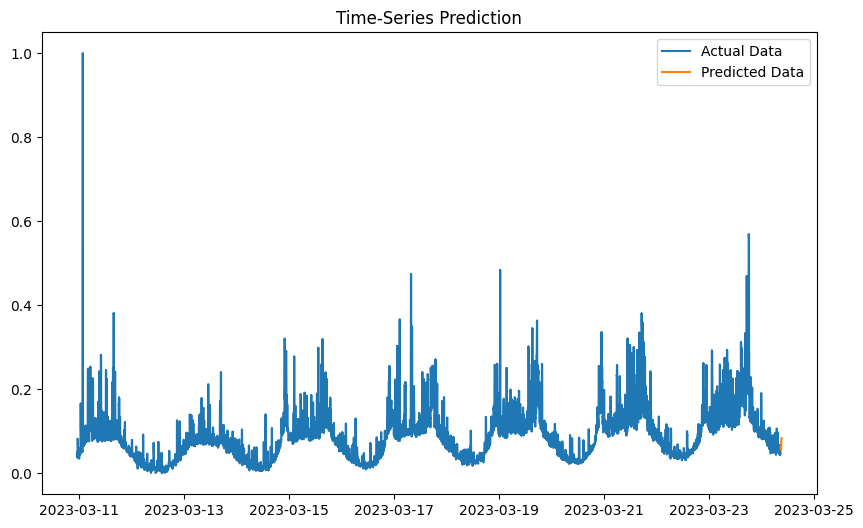

In [126]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6)) 

plt.plot(df['memory_working_set_bytes'], label='Actual Data') 
plt.plot(forecasts_df['memory_working_set_bytes'], label='Predicted Data') 
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

In [116]:
# accuracy of all tried model results
model_results = model.results()
# and aggregated from cross validation
validation_results = model.results("validation")

In [127]:
# after fitting an AutoTS model
example_filename = "autots_export_v1.csv"  # .csv/.json
model.export_template(example_filename, models='best',
                      n=15, max_per_model_class=3)

# on new training
# model = AutoTS(forecast_length=21,
#                frequency='infer', max_generations=0,
#                num_validations=0, verbose=0)
# model = model.import_template(example_filename, method='only') # method='add on'
# print("Overwrite template is: {}".format(str(model.initial_template)))